0 ---> 170315 Single 003 fg300 ccr.txt (1024, 2)
1 ---> Single 001 fg300 ccr.txt (1024, 2)
2 ---> Single 002 fg300 ccr.txt (1024, 2)
3 ---> 170315 Single 002 fg300 ccr.txt (1024, 2)


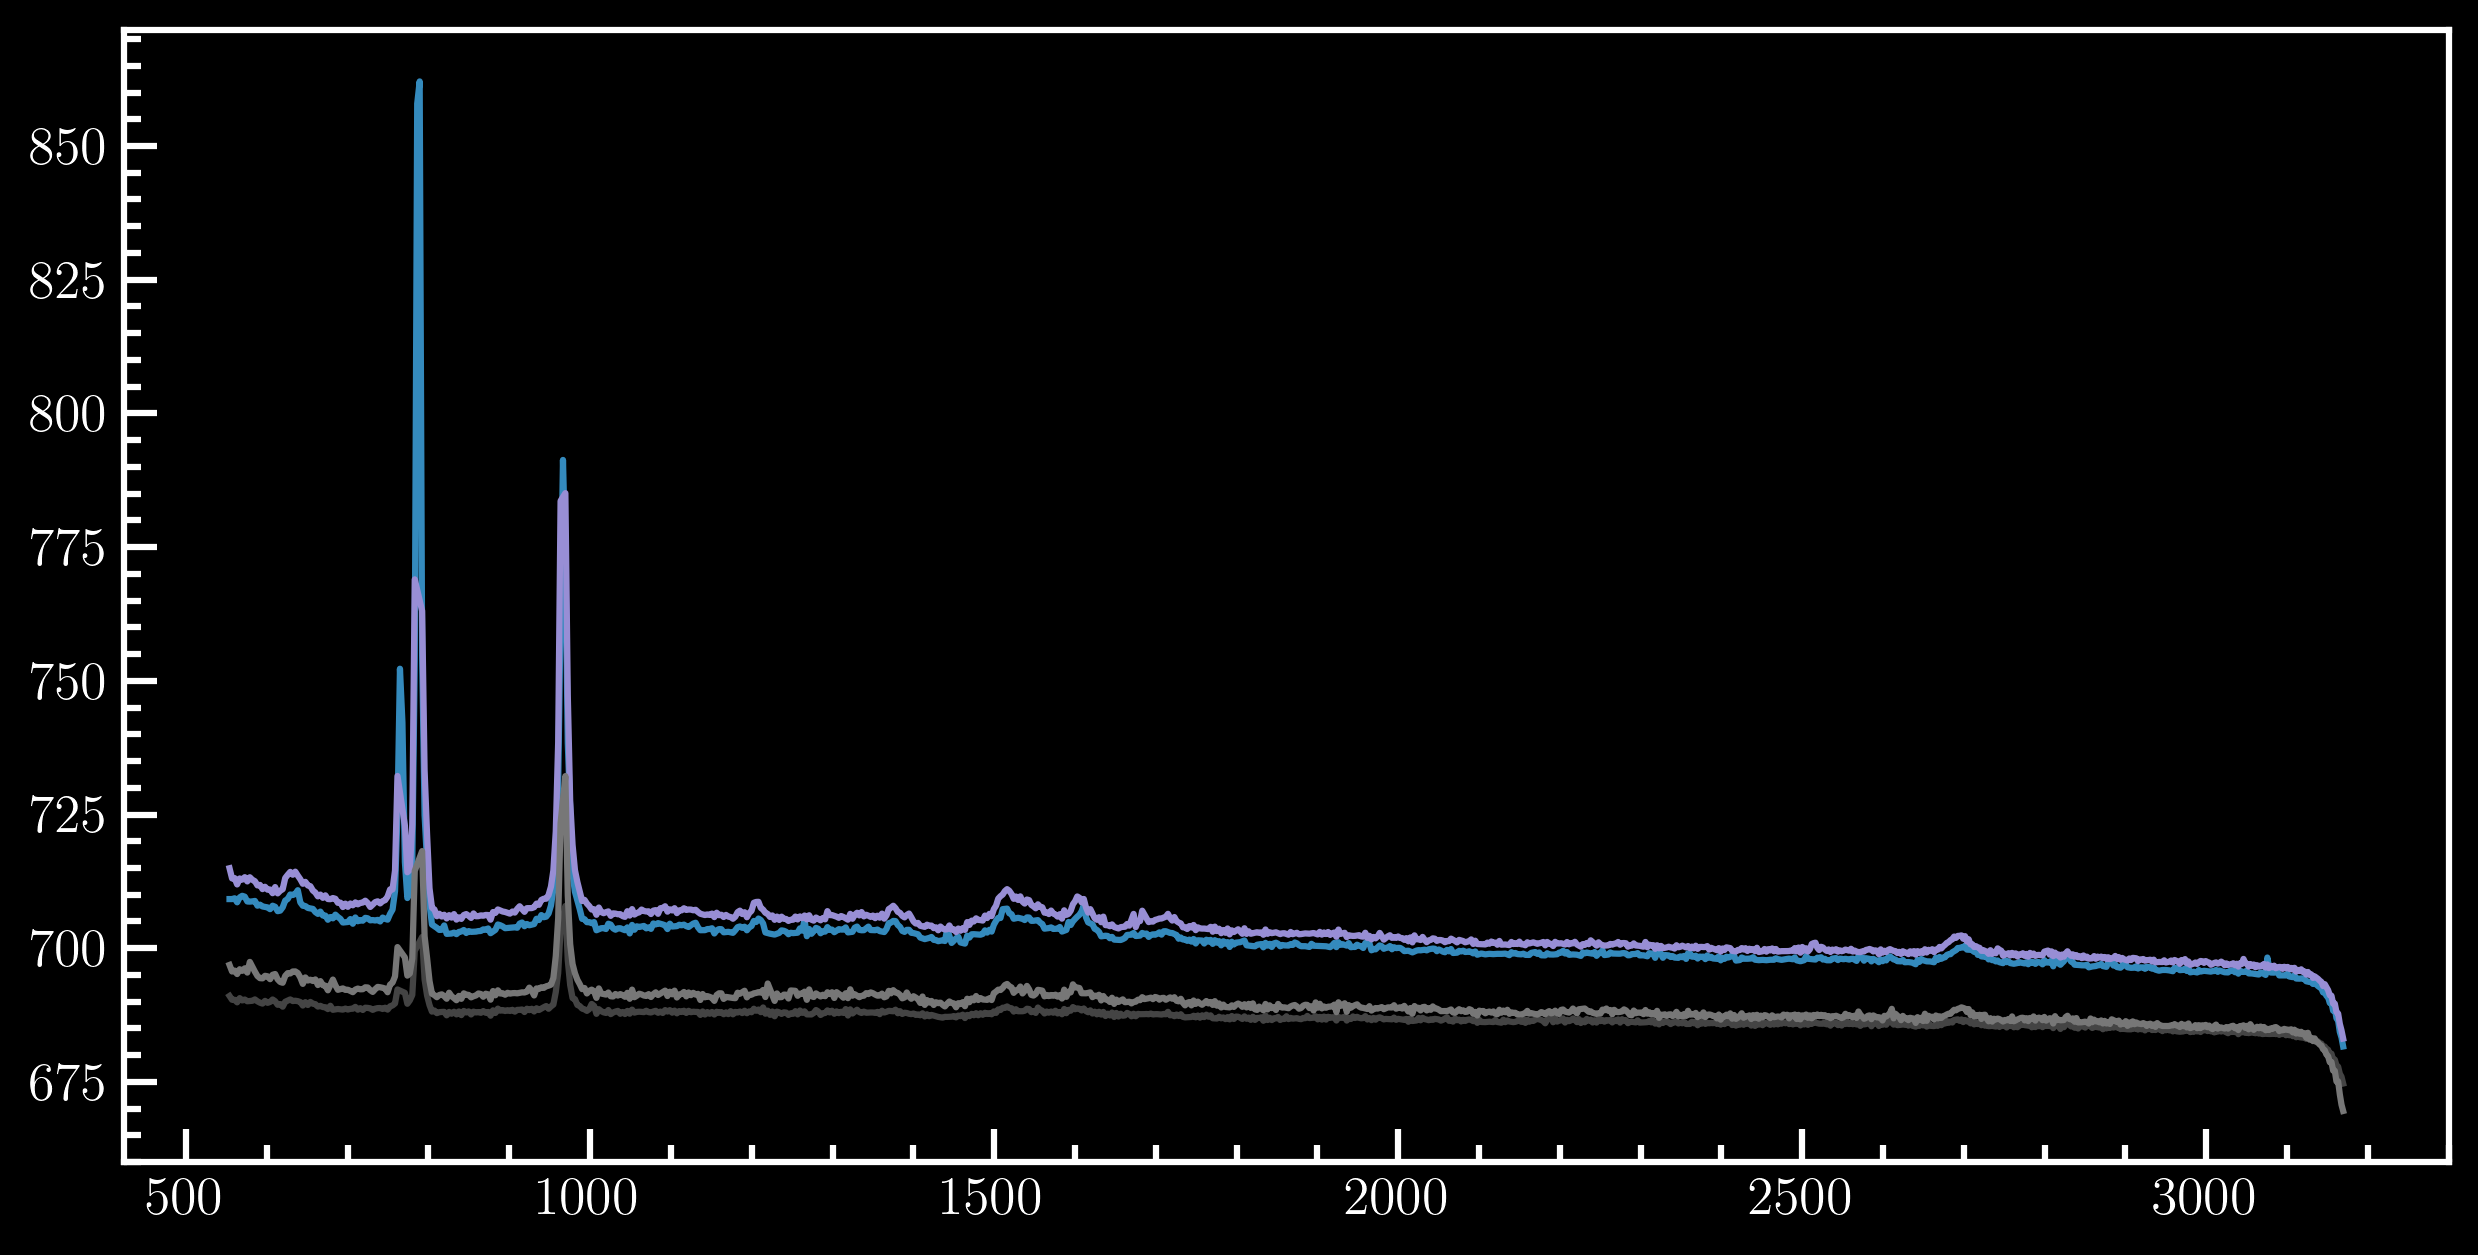

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import glob,os,sys
from IPython.display import display, clear_output

path="/media/labfiles/Gabriela-FR/Experimentos/Graphene/RAMAN/fg300/"
files=glob.glob(path+'*.txt')

from labexp import experiments
plt.style.use('/media/labfiles/lab-codes/plot-styles/plotstyle.mplstyle')

data=[]
for i,j in enumerate(files):
    idata = np.loadtxt(j)
    data.append(idata)
    dims=idata.shape
    print("%d ---> %s %s"%(i,j.split('/')[-1],dims))
    plt.plot(idata[:,0],idata[:,1])



In [46]:
expdata= np.zeros((1024,5))
expdata[:,0]=data[0][:,0]
for i,j in enumerate(data):
    expdata[:,i+1]=j[:,1]
np.savetxt('data/fg300.dat',expdata,delimiter=',')

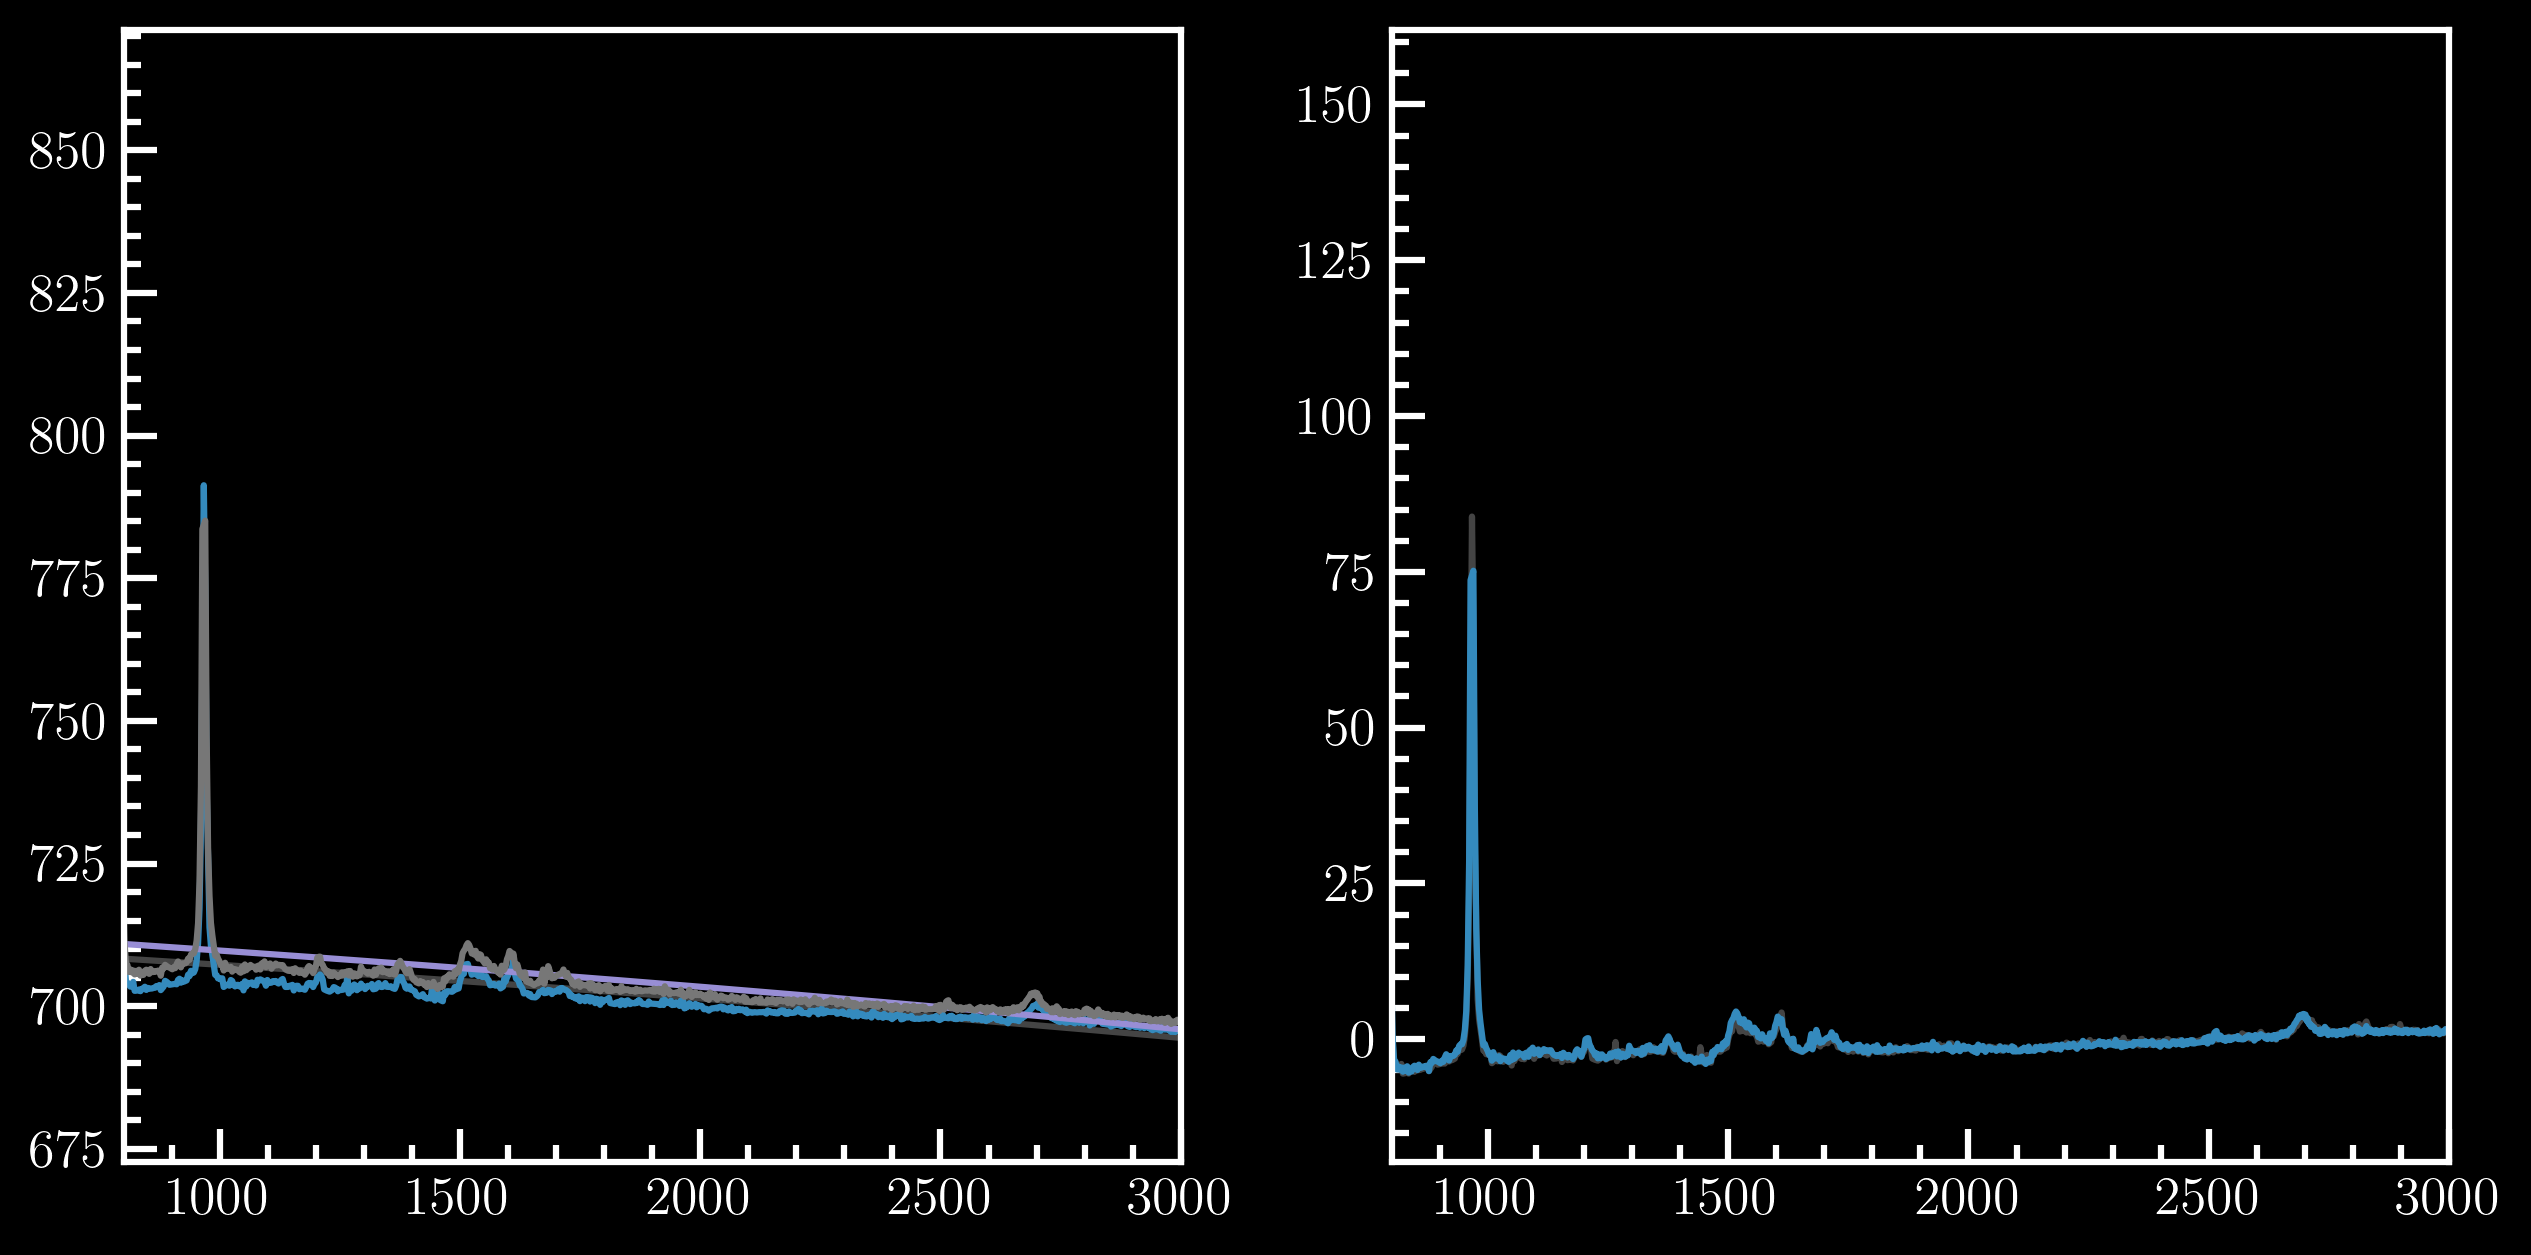

In [78]:
from scipy.signal import savgol_filter

expdatav2= np.zeros((1024,5))
expdatav2[:,0]=data[0][:,0]
fig,(ax0,ax1)=plt.subplots(1,2,figsize=(10,5))
for i in range(2,4):
    spr = savgol_filter(expdata[:,i], 1024, 1) 
    ax0.plot(expdata[:,0],spr) 
    ax0.plot(expdata[:,0],expdata[:,i]) 
    wdata= expdata[:,i]-spr
    ax1.plot(expdata[:,0],wdata)
    expdatav2[:,i]=wdata



for axi in fig.axes:
    axi.set_xlim([800,3000])

np.savetxt('data/fg300-v2.dat',expdatav2,delimiter=',')

In [79]:
expdatav2

array([[ 5.53783255e+02,  0.00000000e+00, -4.14857233e-01,
         2.67297466e+00,  0.00000000e+00],
       [ 5.56931110e+02,  0.00000000e+00, -3.98766654e-01,
         7.76313247e-01,  0.00000000e+00],
       [ 5.60077569e+02,  0.00000000e+00, -2.39487598e-01,
         8.65186505e-01,  0.00000000e+00],
       ...,
       [ 3.16538698e+03,  0.00000000e+00, -8.83183449e+00,
        -8.73134952e+00,  0.00000000e+00],
       [ 3.16745521e+03,  0.00000000e+00, -9.85938404e+00,
        -9.92097968e+00,  0.00000000e+00],
       [ 3.16952266e+03,  0.00000000e+00, -1.15122998e+01,
        -1.14336689e+01,  0.00000000e+00]])

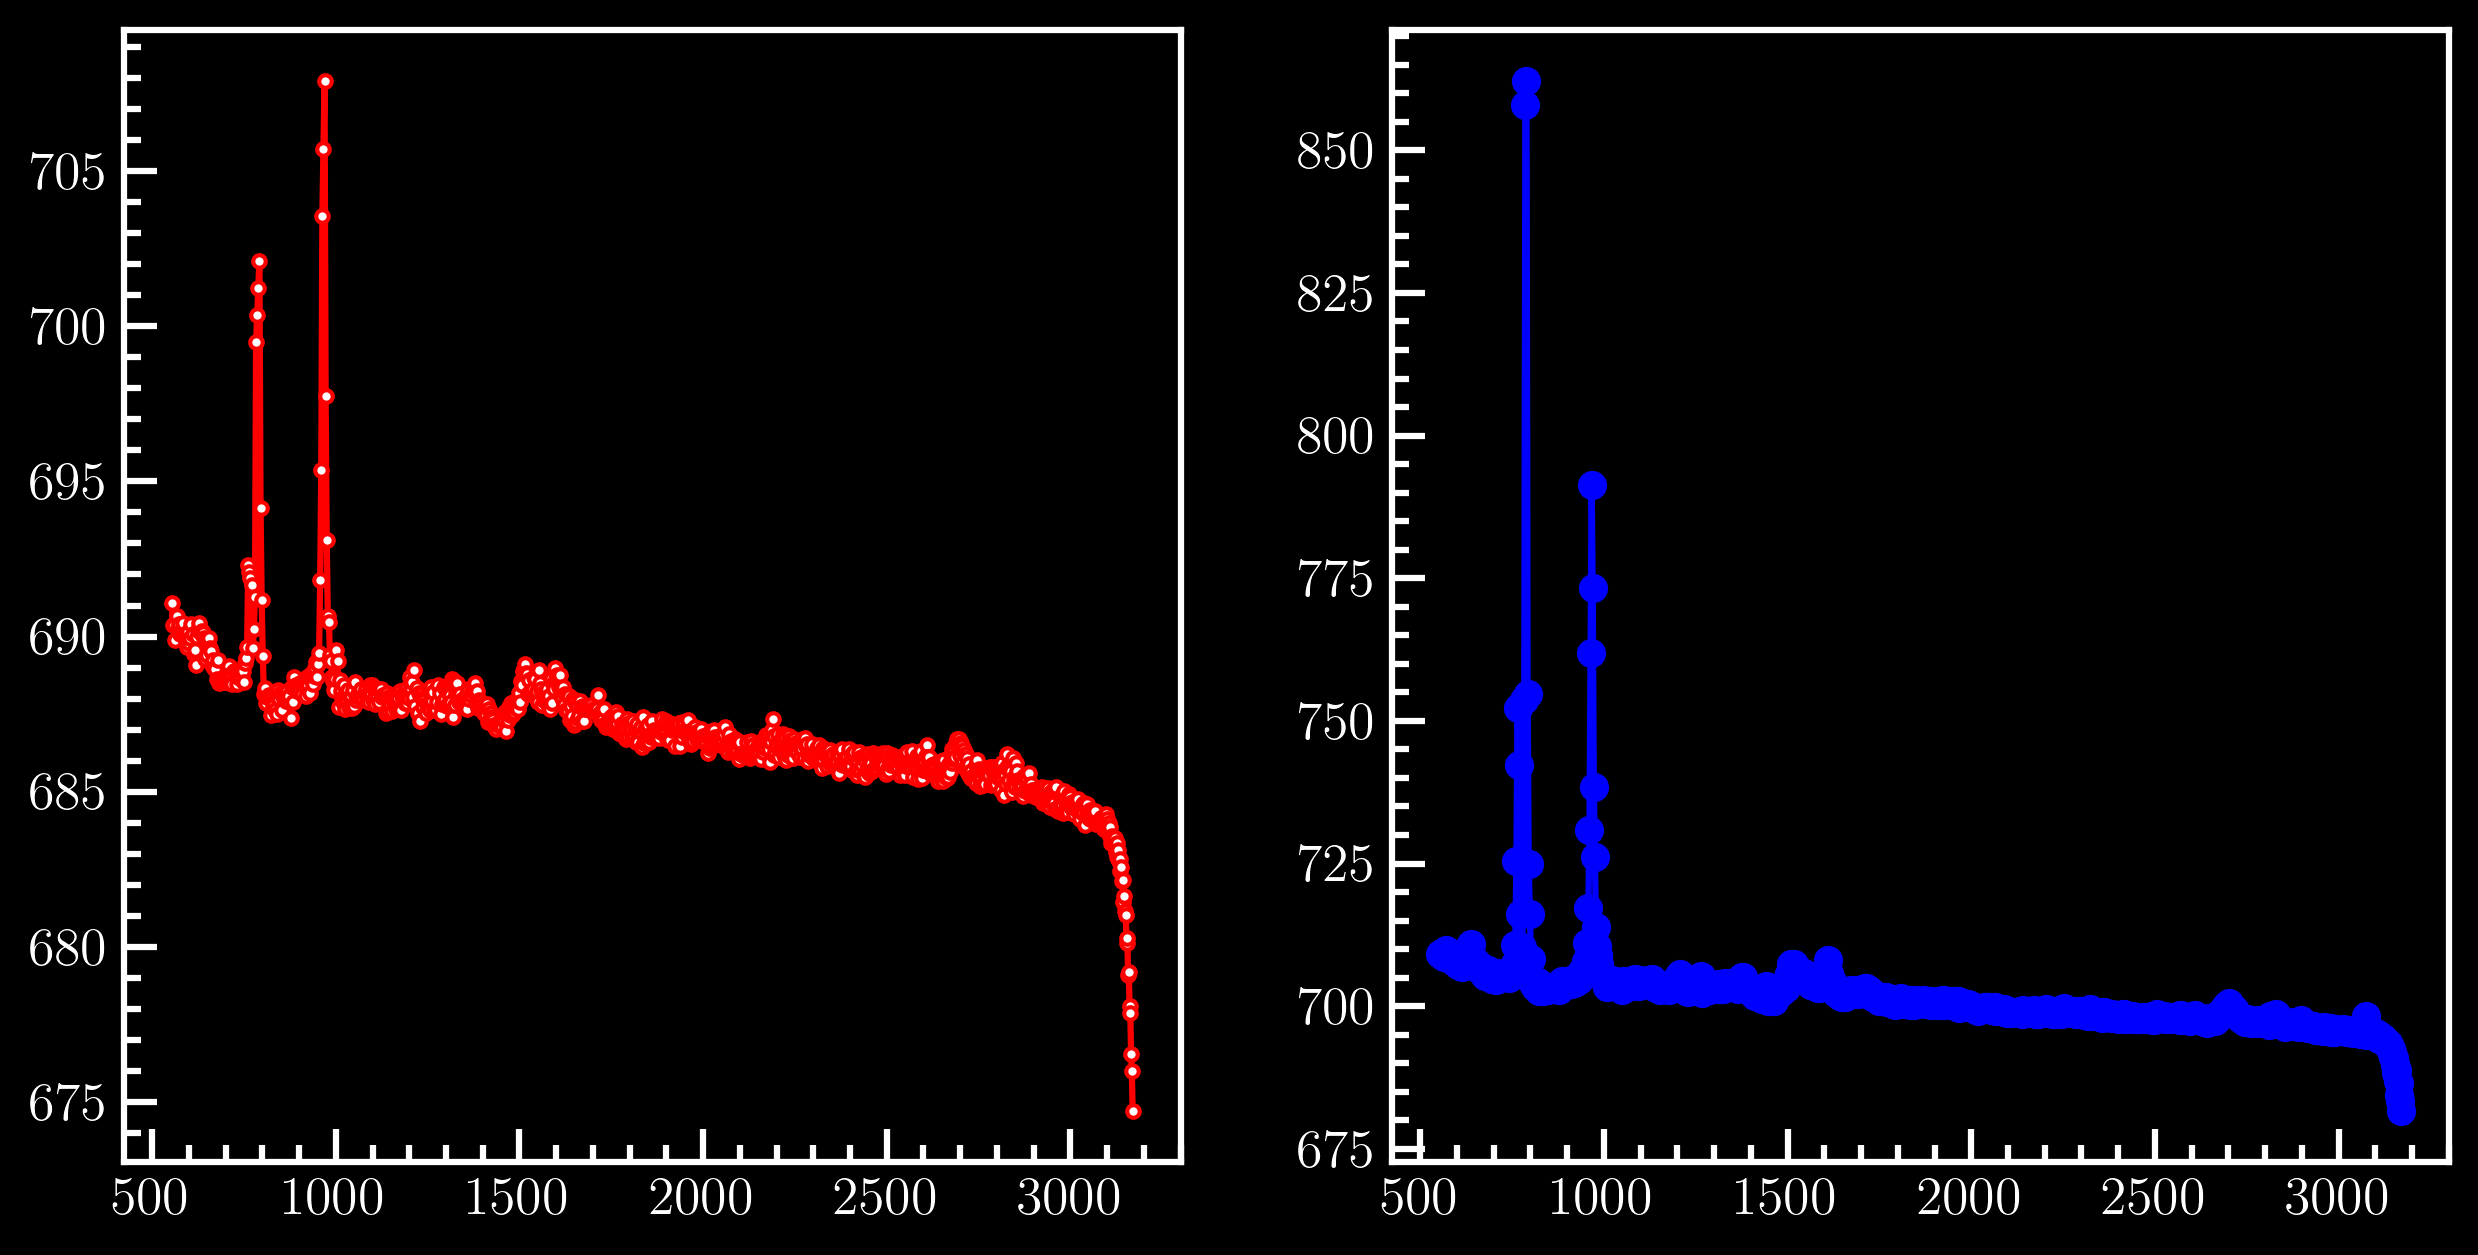

In [21]:
fig,(ax,ax1) =plt.subplots(1,2,figsize=(10,5))
ax.plot(data[0][:,0],data[0][:,1],'-or',mfc='w',ms=3)
ax1.plot(data[1][:,0],data[1][:,1],'-ob')

plt.show()